<a href="https://colab.research.google.com/github/LuanLindolfo/Visao_Computacional/blob/main/Energia_norte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho Final Visão Computacional
####Base de dados contenco a média diária de consumo de energia diário por região do Brasil (Norte [N], Nordeste [NE], Sudeste/Centro-Oeste [SE] e Sul [S]
####Filtro aplicado para obter a média da região Norte [N] e verificar se o dia é classificado com um dia que potencialmente foi de sobrecarga de energia ou não (por volta do consumo diário no valor de 8340)

Fonte: https://dados.ons.org.br/dataset/carga-energia

Trabalho para fins acadêmicos - Trabalho final da matéria de Visão Computacional

Alunos: Lais Sansara e Luan Evaristo

In [148]:
!pip install numpy #para computação numérica, alta performance e ferramentas para operações matemáticas.
!pip -q install plotly #gráficos e dashboards dinâmicos
!pip -q install yellowbrick #visualização de machine learning para avaliar e diagnosticar modelos de forma visual

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
energia = pd.read_csv('/content/drive/MyDrive/Ibama/energiadia.csv', encoding='latin-1', sep=';')
#A codificação padrão (UTF-8) não conseguiu lidar com alguns caracteres no arquivo
energia

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,Norte,2025-01-01,7163.468208
1,NE,Nordeste,2025-01-01,11925.967708
2,S,Sul,2025-01-01,11100.247500
3,SE,Sudeste/Centro-Oeste,2025-01-01,35903.900458
4,N,Norte,2025-01-02,7705.155958
...,...,...,...,...
875,SE,Sudeste/Centro-Oeste,2025-08-07,42456.498833
876,N,Norte,2025-08-08,NaN
877,NE,Nordeste,2025-08-08,NaN
878,S,Sul,2025-08-08,NaN


In [152]:
energia.head(10)

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,Norte,2025-01-01,7163.468208
1,NE,Nordeste,2025-01-01,11925.967708
2,S,Sul,2025-01-01,11100.247500
3,SE,Sudeste/Centro-Oeste,2025-01-01,35903.900458
4,N,Norte,2025-01-02,7705.155958
5,NE,Nordeste,2025-01-02,13837.741792
6,S,Sul,2025-01-02,13346.921750
7,SE,Sudeste/Centro-Oeste,2025-01-02,42515.234500
8,N,Norte,2025-01-03,7800.789708
9,NE,Nordeste,2025-01-03,14230.539125


In [153]:
energia.tail(10)

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
870,S,Sul,2025-08-06,13119.766292
871,SE,Sudeste/Centro-Oeste,2025-08-06,41975.530750
872,N,Norte,2025-08-07,8576.003833
873,NE,Nordeste,2025-08-07,12898.990500
874,S,Sul,2025-08-07,13163.146208
875,SE,Sudeste/Centro-Oeste,2025-08-07,42456.498833
876,N,Norte,2025-08-08,NaN
877,NE,Nordeste,2025-08-08,NaN
878,S,Sul,2025-08-08,NaN
879,SE,Sudeste/Centro-Oeste,2025-08-08,NaN


In [154]:
energia.describe()

,val_cargaenergiamwmed
count,876.000000
mean,20016.370792
std,14669.437750
min,6858.350125
25%,9313.565229
50%,13585.704625
75%,22968.189302
max,55552.921917


In [155]:
#melhor leitura de dados em tempo, ja que trabalhamos com carga diaria
energia_norte = energia[energia['id_subsistema'] == 'N'].copy()
energia_norte['din_instante'] = pd.to_datetime(energia_norte['din_instante'])#transformando em formato de horário
energia_norte['dia_semana'] = energia_norte['din_instante'].dt.day_name()#transformando em dia da semana
energia_norte['mes'] = energia_norte['din_instante'].dt.month_name()#transformando em mês
energia_norte['ano'] = energia_norte['din_instante'].dt.year#transformando em ano
energia_norte

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano
0,N,Norte,2025-01-01,7163.468208,Wednesday,January,2025
4,N,Norte,2025-01-02,7705.155958,Thursday,January,2025
8,N,Norte,2025-01-03,7800.789708,Friday,January,2025
12,N,Norte,2025-01-04,7450.600792,Saturday,January,2025
16,N,Norte,2025-01-05,7168.761167,Sunday,January,2025
...,...,...,...,...,...,...,...
860,N,Norte,2025-08-04,8425.650875,Monday,August,2025
864,N,Norte,2025-08-05,8652.004083,Tuesday,August,2025
868,N,Norte,2025-08-06,8640.126917,Wednesday,August,2025
872,N,Norte,2025-08-07,8576.003833,Thursday,August,2025


In [156]:
energia_norte.describe()

,din_instante,val_cargaenergiamwmed,ano
count,220,219.000000,220.0
mean,2025-04-20 12:00:00,7982.539673,2025.0
min,2025-01-01 00:00:00,6858.350125,2025.0
25%,2025-02-24 18:00:00,7773.057271,2025.0
50%,2025-04-20 12:00:00,8015.667417,2025.0
75%,2025-06-14 06:00:00,8244.410729,2025.0
max,2025-08-08 00:00:00,8667.425042,2025.0
std,NaN,354.106781,0.0


In [157]:
media_energia = energia_norte['val_cargaenergiamwmed'].mean()
media_energia

np.float64(7982.53967294516)

In [158]:
std_energia = energia_norte['val_cargaenergiamwmed'].std()
std_energia

354.10678091784985

In [159]:
#somando os dois - 7982.53 + 354.10 = aproximadamente 8340

#Avaliação do Norte -> VALOR_CARGA_MWmed se refere a carga de cada regiao de forma diaria, nesse caso, o valor é apenas do norte
##Tomando como base que 30000 é os dias em que há risco de sobrecarga

In [160]:
len(energia_norte[(energia_norte['val_cargaenergiamwmed']>=8340)])

39

Se esses valores forem maior que o valor médio de sobrecarga diária - apresenta risco (1)

Se esses valores forem menores que o valor médio de sobrecarga diária - não apresenta risco (0)

#Visualização de dados

In [161]:
np.unique(energia_norte['val_cargaenergiamwmed'], return_counts=True)#contagem no registro de cada uma das classes
#os registros da classe

#sns -> mostra mais a relação de variáveis de forma em análise gráfica, e oferece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
#plt -> uma biblioteca de visualização de dados mais fundamental e de baixo nível.

(array([6858.350125  , 6962.76741667, 7109.84925   , 7129.51754167,
        7154.383875  , 7163.46820833, 7168.76116667, 7189.60504167,
        7307.23725   , 7314.75154167, 7327.09154167, 7339.691     ,
        7394.48533333, 7398.0885    , 7429.728875  , 7450.60079167,
        7478.67991667, 7480.35541667, 7484.735     , 7515.45066667,
        7523.78766667, 7524.995     , 7544.95658333, 7546.6585    ,
        7571.19116667, 7575.25066667, 7579.664625  , 7579.88079167,
        7581.69933333, 7589.58033333, 7597.88233333, 7600.18720833,
        7600.85958333, 7614.797125  , 7618.910125  , 7622.221875  ,
        7627.42875   , 7632.11179167, 7641.602875  , 7659.8265    ,
        7673.50870833, 7677.75333333, 7679.46058333, 7680.27370833,
        7685.50275   , 7696.24966667, 7705.15595833, 7725.14570833,
        7752.27616667, 7754.818875  , 7755.431625  , 7757.65579167,
        7764.70733333, 7765.85929167, 7770.6575    , 7775.45704167,
        7777.167625  , 7779.41541667, 7781.50866

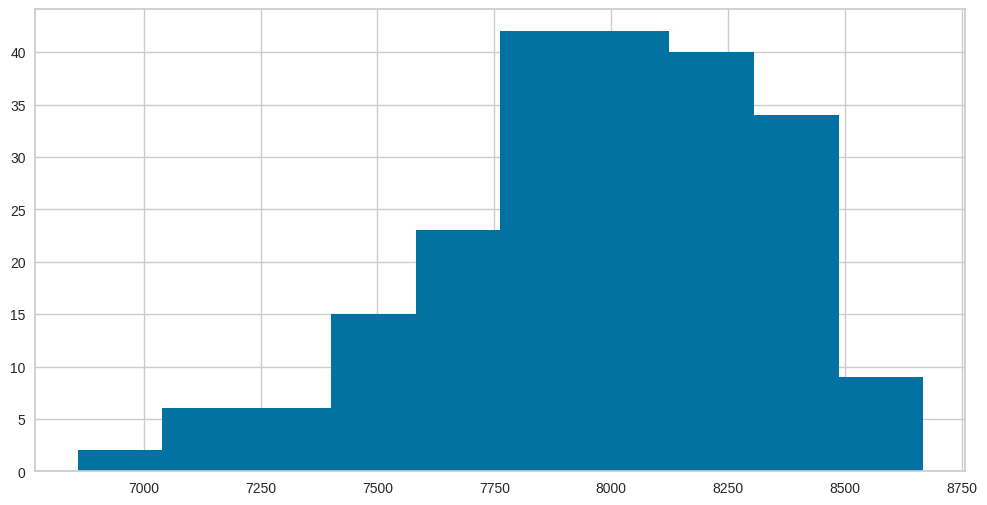

In [162]:
plt.figure(figsize=(12, 6)) # Define o tamanho da figura (largura, altura)
plt.hist(x = energia_norte['val_cargaenergiamwmed']);#histograma de ilesos

In [163]:
#scatter - grafico em dispersao
grafico = px.scatter_matrix(energia_norte, dimensions=['val_cargaenergiamwmed', 'dia_semana', 'mes', 'ano'], color='val_cargaenergiamwmed')
grafico.update_traces(diagonal_visible=False)
#criando grafico dinamico - importante ara perceber outliers
#combina no eixo x e y
#color = 'default - cor com base nos dados de default (0 e 1), que diz se a pessoa paga ou nao paga o empréstimo
#base_credit - origem do arquivo
#juncao de atributos em graficos
#[] - atributos da visualizacao nos gráficos
grafico.update_layout(height=800, width=1600) # Ajuste a altura e largura conforme necessário
grafico.show()

#Tratamento de valores inconsistentes (análise em dados errados e a correção destes valores)

In [164]:
energia_norte.describe()

,din_instante,val_cargaenergiamwmed,ano
count,220,219.000000,220.0
mean,2025-04-20 12:00:00,7982.539673,2025.0
min,2025-01-01 00:00:00,6858.350125,2025.0
25%,2025-02-24 18:00:00,7773.057271,2025.0
50%,2025-04-20 12:00:00,8015.667417,2025.0
75%,2025-06-14 06:00:00,8244.410729,2025.0
max,2025-08-08 00:00:00,8667.425042,2025.0
std,NaN,354.106781,0.0


In [165]:
#exemplo de outlier
energia_norte[energia_norte['val_cargaenergiamwmed'].isnull()]
#mesmo que seja um número alto e não tão comum, trata-se de um evento real, nesse caso, mantendo ele, é possível analisar o espectro geral de acidentes

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano
876,N,Norte,2025-08-08,NaN,Friday,August,2025


Valores faltantes

In [166]:
energia_norte.isnull()

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed,dia_semana,mes,ano
0,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
860,False,False,False,False,False,False,False
864,False,False,False,False,False,False,False
868,False,False,False,False,False,False,False
872,False,False,False,False,False,False,False


In [167]:
energia_norte.isnull().sum()

,0
id_subsistema,0
nom_subsistema,0
din_instante,0
val_cargaenergiamwmed,1
dia_semana,0
mes,0
ano,0


In [168]:
energia_norte = energia_norte.dropna(subset=['val_cargaenergiamwmed'])
energia_norte.isnull().sum()

,0
id_subsistema,0
nom_subsistema,0
din_instante,0
val_cargaenergiamwmed,0
dia_semana,0
mes,0
ano,0


#Divisão entre previsores e classe

In [169]:
#separando previsores e variável alvo
X_energia_norte = energia_norte[['nom_subsistema','dia_semana', 'mes', 'ano']]
y_energia_norte = energia_norte['val_cargaenergiamwmed']

print("Variáveis previsoras (X_acidente) shape:", X_energia_norte.shape)
print("Variável alvo (y_acidente) shape:", y_energia_norte.shape)

type(X_energia_norte)#vendo o tipo
type(y_energia_norte)#vendo o tipo

Variáveis previsoras (X_acidente) shape: (219, 4)
Variável alvo (y_acidente) shape: (219,)


pandas.core.series.Series

In [170]:
quantiles = y_energia_norte.quantile([0, 0.33, 0.66, 1])
bins = [quantiles[0], quantiles[0.33], quantiles[0.66], quantiles[1]]
labels = ['Baixa', 'Média', 'Alta']
y_energia_norte_categorizada = pd.cut(y_energia_norte, bins=bins, labels=labels, include_lowest=True)

#Label Encoder -> Tratar valores categoricos

In [171]:
from sklearn.preprocessing import LabelEncoder
#Biblioteca para conversao de dados categoricos parta numericos sendo possivel tratar os dados

In [172]:
label_encoder_energia = LabelEncoder()#objeto da classe

In [173]:
print(X_energia_norte[['nom_subsistema','dia_semana', 'mes', 'ano']])

    nom_subsistema dia_semana      mes   ano
0            Norte  Wednesday  January  2025
4            Norte   Thursday  January  2025
8            Norte     Friday  January  2025
12           Norte   Saturday  January  2025
16           Norte     Sunday  January  2025
..             ...        ...      ...   ...
856          Norte     Sunday   August  2025
860          Norte     Monday   August  2025
864          Norte    Tuesday   August  2025
868          Norte  Wednesday   August  2025
872          Norte   Thursday   August  2025

[219 rows x 4 columns]


In [175]:
#criando um label_encoder para cada um dos atributos
label_encoder_subsistema = LabelEncoder()
label_encoder_diasemana = LabelEncoder()
label_encoder_mes = LabelEncoder()

In [176]:
#acessando a variavel e aplicando o label_encoder para transformar
#para as colunas nao presentes, e pq ja sao numericas
X_energia_norte['nom_subsistema'] = label_encoder_subsistema.fit_transform(X_energia_norte['nom_subsistema'])
X_energia_norte['dia_semana'] = label_encoder_diasemana.fit_transform(X_energia_norte['dia_semana'])
X_energia_norte['mes'] = label_encoder_mes.fit_transform(X_energia_norte['mes'])

/tmp/ipython-input-2522321626.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2522321626.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2522321626.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
print(X_energia_norte[['nom_subsistema', 'dia_semana', 'mes']])

     nom_subsistema  dia_semana  mes
0                 0           6    3
4                 0           4    3
8                 0           0    3
12                0           2    3
16                0           3    3
..              ...         ...  ...
856               0           3    1
860               0           1    1
864               0           5    1
868               0           6    1
872               0           4    1

[219 rows x 3 columns]


In [255]:
print(y_energia_norte)

0      7163.468208
4      7705.155958
8      7800.789708
12     7450.600792
16     7168.761167
          ...     
856    7752.276167
860    8425.650875
864    8652.004083
868    8640.126917
872    8576.003833
Name: val_cargaenergiamwmed, Length: 219, dtype: float64


In [266]:
print(y_energia_norte_categorizada)

0      Baixa
4      Baixa
8      Baixa
12     Baixa
16     Baixa
       ...  
856    Baixa
860     Alta
864     Alta
868     Alta
872     Alta
Name: val_cargaenergiamwmed, Length: 219, dtype: category
Categories (3, object): ['Baixa' < 'Média' < 'Alta']


In [259]:
print(y_energia_norte_categorizada[y_energia_norte_categorizada == 'Média'])

32     Média
36     Média
88     Média
108    Média
112    Média
       ...  
784    Média
788    Média
796    Média
824    Média
852    Média
Name: val_cargaenergiamwmed, Length: 72, dtype: category
Categories (3, object): ['Baixa' < 'Média' < 'Alta']


In [260]:
print(y_energia_norte[112])

8005.18333333


In [264]:
#escalonando baixa, media e alta
label_encoder_energia_cat = LabelEncoder()
y_energia_norte_encoded = label_encoder_energia_cat.fit_transform(y_energia_norte_categorizada)
display(y_energia_norte_encoded)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1,
       2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0])

#Escalonamento dos valores

In [179]:
from sklearn.preprocessing import StandardScaler #para escalonamento de valores - padronizacao
scaler_energia = StandardScaler() #objeto
X_energia_norte_scaled = scaler_energia.fit_transform(X_energia_norte)#tranformando e escalonando - tem + duas dimensoes, por isso o escalonamento -> usado para escalar as features (variáveis preditoras)
X_energia_norte_scaled[0]

array([ 0.        ,  1.48923055, -0.35687832,  0.        ])

# Divisão das bases em treinamento e teste

In [267]:
from sklearn.model_selection import train_test_split #importacao das bases

# Dividir os dados transformados (previsores) e a variável alvo
# test_size=0.25 -> 25% dos dados pra teste e 75% para treino
# random_state=0 garante que a divisão seja a mesma toda vez que o código for executado -> não randomiza nada
X_treino_energia_norte, X_teste_energia_norte, y_treino_energia_norte_encoded, y_teste_energia_norte_encoded = train_test_split(X_energia_norte_scaled, y_energia_norte_encoded, test_size=0.25, random_state=0)

print("treino (previsores):", X_treino_energia_norte.shape)
print("teste (previsores):", X_teste_energia_norte.shape)
print("treino (codificado):", y_treino_energia_norte_encoded.shape) #variável alvo
print("teste (codificado):", y_teste_energia_norte_encoded.shape) #variável alvo

treino (previsores): (164, 4)
teste (previsores): (55, 4)
treino (codificado): (164,)
teste (codificado): (55,)


#Árvore de decisão - não é bom pois os dados são massivos e a árvore fica extensa e sem poder ler

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
#Criando árvore de decisão
arvore_energia = DecisionTreeClassifier(criterion='entropy', random_state=0)
#DecisionTreeClassifier objeto que foi importado
#critério - criterion='entropy'
arvore_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#.fit - encaixar os dados no algoritmo
#gerando todos os calculos

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [184]:
arvore_energia.feature_importances_
#.feature_importances_ - retorna a importancia de cada um dos atributos
#ou seja, o que tem o maior ganho d e informação

array([0.        , 0.59445057, 0.40554943, 0.        ])

In [185]:
arvore_energia.classes_
#lista de valores das classes
#no caso, os tipos de acidente

array([0, 1, 2])

In [268]:
from sklearn import tree
#gerando o grafico da arvore de decisao
previsores = ['nom_subsistema','dia_semana', 'mes', 'ano'] # Update feature names to match the scaled data
#para melhor visualizacao, atributos em lista
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(100,100)) # Increased figure size
#definindo uma figura
tree.plot_tree(arvore_energia, feature_names=previsores, class_names = label_encoder_energia_cat.classes_, filled=True);#passando o
#filled=True - preenchendo o grafico para melhor visualizacao
#importanto tudo no metodo da arvore
#class_names = arvore_risco_credito.classes_ - pra falar se o risco é alto, moderado ou baixo

#Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
#.ensemble - unir varios algoritmos em um so pacote

In [188]:
 X_treino_energia_norte.shape, y_treino_energia_norte.shape

((164, 4), (164,))

In [189]:
X_teste_energia_norte.shape, y_teste_energia_norte.shape

((55, 4), (55,))

In [190]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators=40 - numero de arvores de decisao que vai criar - voto da maioria
#100 é o padrão
#Nem sempre a maior quantidade de ávores significa parametros melhores
random_forest_classifier_energia = RandomForestClassifier(n_estimators=40, random_state = 0)
random_forest_classifier_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#passando os atrributos como parametros

RandomForestClassifier(n_estimators=40, random_state=0)

In [191]:
previsoes_rf = random_forest_classifier_energia.predict(X_teste_energia_norte) #gerando as previsoes
previsoes_rf

array([2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1])

In [192]:
y_teste_energia_norte_cat

,val_cargaenergiamwmed
608,Alta
296,Baixa
284,Alta
644,Alta
648,Média
572,Média
252,Baixa
612,Alta
872,Alta
540,Média


In [193]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score
#passando as respoista reais e as previsoes para a metrica
print("Accuracy:", accuracy_score(y_teste_energia_norte_encoded, previsoes_rf))
print("F1 Score:", f1_score(y_teste_energia_norte_encoded, previsoes_rf, average='weighted'))
print("Recall Score:", recall_score(y_teste_energia_norte_encoded, previsoes_rf, average='weighted'))
print(classification_report(y_teste_energia_norte_encoded, previsoes_rf))

#macro analisa o desempenho em cada classe
#weighted analisa o desempenho geral com base no tamanho

Accuracy: 0.5818181818181818
F1 Score: 0.5947844538753629
Recall Score: 0.5818181818181818
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.79      0.71      0.75        21
           2       0.33      0.44      0.38        16

    accuracy                           0.58        55
   macro avg       0.60      0.57      0.58        55
weighted avg       0.62      0.58      0.59        55



0.5818181818181818

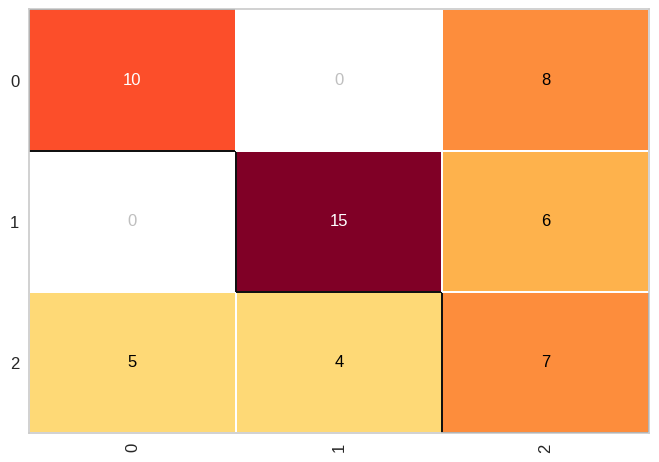

In [194]:
from yellowbrick.classifier import ConfusionMatrix
#matriz de confusao
cm = ConfusionMatrix(random_forest_classifier_energia)
cm.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
cm.score(X_teste_energia_norte, y_teste_energia_norte_encoded)
#encaixando os atributos como parametro e verificando as metricas

#SVM

In [195]:
from sklearn.svm import SVC #svc - nome da classe a ser importada

In [196]:
X_treino_energia_norte.shape, y_treino_energia_norte_encoded.shape #registros treinamento

((164, 4), (164,))

In [197]:
X_teste_energia_norte.shape, y_teste_energia_norte.shape #registros de teste

((55, 4), (55,))

In [198]:
svm_energia = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
#kernel='rbf' - tipo do Kernel - base de dados diferentes requerem tipos diferentes de Kernel
#faz o teste e vê o melhor
#random_state=1 - para que sempre que execute tenha o mesmo resultado
#C = 2.0 - maior o valor, mais perfeita a divisão dos dados
svm_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#treinamento

SVC(C=2.0, random_state=1)

In [199]:
previsoes_svm = svm_energia.predict(X_teste_energia_norte)#treinamento
previsoes_svm

array([2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1,
       0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1])

In [200]:
y_teste_energia_norte_encoded#respostas reais
#para fins de comparação

array([0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1])

In [201]:
from sklearn.metrics import accuracy_score, classification_report#metricas
accuracy_score(y_teste_energia_norte_encoded, previsoes_svm)

0.4909090909090909

In [202]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score#metricas
print("Accuracy:", accuracy_score(y_teste_energia_norte_encoded, previsoes_svm))
print("F1 Score:", f1_score(y_teste_energia_norte_encoded, previsoes_svm, average='weighted')) # Use weighted average for multiclass
print("Recall Score:", recall_score(y_teste_energia_norte_encoded, previsoes_svm, average='weighted')) # Use weighted average for multiclass
print(classification_report(y_teste_energia_norte_encoded, previsoes_svm))

#macro analisa o desempenho em cada classe
#weighted analisa o desempenho geral com base no tamanho

Accuracy: 0.4909090909090909
F1 Score: 0.4975401069518717
Recall Score: 0.4909090909090909
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        18
           1       0.63      0.57      0.60        21
           2       0.22      0.25      0.24        16

    accuracy                           0.49        55
   macro avg       0.49      0.48      0.48        55
weighted avg       0.51      0.49      0.50        55



0.4909090909090909

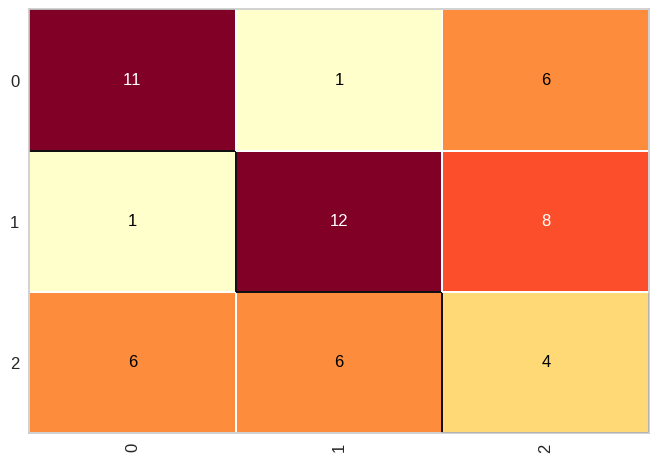

In [203]:
from yellowbrick.classifier import ConfusionMatrix
#matriz de confusao
cm = ConfusionMatrix(svm_energia)
cm.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
cm.score(X_teste_energia_norte, y_teste_energia_norte_encoded)
#encaixando os atributos como parametro e verificando as metricas

# Redes neurais artificiais

In [204]:
from sklearn.neural_network import MLPClassifier
#MLPClassifier - Multi Layer Perceptron

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [250]:
#A grade de parâmetros pro grid ver o melhor
parameter_grid = {
    'hidden_layer_sizes': [(30,), (50,), (70,), (30, 30), (50, 50), (70, 70), (30, 50), (50, 30), (30, 30, 30), (50, 50, 50), (70, 70, 70), (30, 30, 30, 30), (50, 50, 50, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.0003, 0.003, 0.03],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [251]:
#Verifica o melhor padrão na rede neural por meio da validação cruzada
grid_search.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#treinando com validação cruzada

#Melhor parametro e melhor resultado
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("\nMelhor acurácia na validação cruzada:")
print(grid_search.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Melhores parâmetros encontrados:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}

Melhor acurácia na validação cruzada:
0.6950757575757576


In [253]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
# o 3 vem do treinamento, 3 atributos e a saída vem da sapida do teste, 0 ou 1 (paga ou nao)
rede_neural_energia = MLPClassifier(max_iter=1500, verbose=True, tol=0.0001,
                                   #max_iter=1500 - para iteracoes para covergir o erro
                                   #verbose=True - para que o algoritmo mostre as mensagem epoca por epoca
                                   #loss - erro (objetivo é diminuir)
#configurado para ir ate a 1500, mas para na 742, nao precisa ir ate 1500
#Iteration 742, loss = 0.00212129
#Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.
#pelo motivo de ele não conseguir melhorar mais o erro, já foi o máximo
#tol=0.0000100 - para que ele possa ir mais, só configurar o parâmetro tol
                                   solver = 'adam', activation = 'tanh', learning_rate = 'constant',
                                   #activation = 'relu'- para cenarios mais complexos, no lugar do sigmoide
                                   hidden_layer_sizes = (100, 100))
                                    #nem sempre uma grande quantidade de neurônios na camada oculta, significa melhor taxa de acerto
#hidden_layer_sizes = (20,20) - duas camadas ocultas e cada uma com 20 neurônios
rede_neural_energia.fit(X_treino_energia_norte, y_treino_energia_norte_encoded)
#faz ajuste dos pesos e encaixa os dados

Iteration 1, loss = 1.17709826
Iteration 2, loss = 1.13772752
Iteration 3, loss = 1.10870951
Iteration 4, loss = 1.09002494
Iteration 5, loss = 1.08052062
Iteration 6, loss = 1.07783821
Iteration 7, loss = 1.07903795
Iteration 8, loss = 1.08160114
Iteration 9, loss = 1.08399313
Iteration 10, loss = 1.08558709
Iteration 11, loss = 1.08629823
Iteration 12, loss = 1.08623437
Iteration 13, loss = 1.08549244
Iteration 14, loss = 1.08412464
Iteration 15, loss = 1.08221185
Iteration 16, loss = 1.07992816
Iteration 17, loss = 1.07753188
Iteration 18, loss = 1.07530215
Iteration 19, loss = 1.07346700
Iteration 20, loss = 1.07215415
Iteration 21, loss = 1.07137695
Iteration 22, loss = 1.07105243
Iteration 23, loss = 1.07103844
Iteration 24, loss = 1.07117410
Iteration 25, loss = 1.07131210
Iteration 26, loss = 1.07133799
Iteration 27, loss = 1.07117689
Iteration 28, loss = 1.07079267
Iteration 29, loss = 1.07018529
Iteration 30, loss = 1.06938833
Iteration 31, loss = 1.06846413
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1500,
              verbose=True)

In [247]:
previsoes_nn = rede_neural_energia.predict(X_teste_energia_norte)#previsoes
previsoes_nn

array([2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1])

In [248]:
y_teste_energia_norte_encoded

array([0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1])

In [249]:
from sklearn.metrics import accuracy_score, classification_report#metricas
accuracy_score(y_teste_energia_norte_encoded, previsoes_nn)

0.5818181818181818

In [220]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, recall_score#metricas
print("Accuracy:", accuracy_score(y_teste_energia_norte_encoded, previsoes_nn))
print("F1 Score:", f1_score(y_teste_energia_norte_encoded, previsoes_nn, average='weighted'))
print("Recall Score:", recall_score(y_teste_energia_norte_encoded, previsoes_nn, average='weighted'))
print(classification_report(y_teste_energia_norte_encoded, previsoes_nn))
#macro analisa o desempenho em cada classe
#weighted analisa o desempenho geral com base no tamanho

Accuracy: 0.6
F1 Score: 0.6195887445887446
Recall Score: 0.6
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.93      0.67      0.78        21
           2       0.38      0.62      0.48        16

    accuracy                           0.60        55
   macro avg       0.65      0.60      0.61        55
weighted avg       0.68      0.60      0.62        55



In [213]:
metrics = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_teste_energia_norte_encoded, random_forest_classifier_energia.predict(X_teste_energia_norte)),
        'F1 Score': f1_score(y_teste_energia_norte_encoded, random_forest_classifier_energia.predict(X_teste_energia_norte), average='weighted'),
        'Recall Score': recall_score(y_teste_energia_norte_encoded, random_forest_classifier_energia.predict(X_teste_energia_norte), average='weighted')
    },
    'SVM': {
        'Accuracy': accuracy_score(y_teste_energia_norte_encoded, svm_energia.predict(X_teste_energia_norte)),
        'F1 Score': f1_score(y_teste_energia_norte_encoded, svm_energia.predict(X_teste_energia_norte), average='weighted'),
        'Recall Score': recall_score(y_teste_energia_norte_encoded, svm_energia.predict(X_teste_energia_norte), average='weighted')
    },
    'Rede Neural': {
        'Accuracy': accuracy_score(y_teste_energia_norte_encoded, rede_neural_energia.predict(X_teste_energia_norte)),
        'F1 Score': f1_score(y_teste_energia_norte_encoded, rede_neural_energia.predict(X_teste_energia_norte), average='weighted'),
        'Recall Score': recall_score(y_teste_energia_norte_encoded, rede_neural_energia.predict(X_teste_energia_norte), average='weighted')
    }
}
metrics_df = pd.DataFrame(metrics).T
display(metrics_df)

,Accuracy,F1 Score,Recall Score
Random Forest,0.581818,0.594784,0.581818
SVM,0.490909,0.497540,0.490909
Rede Neural,0.618182,0.637224,0.618182
